In [5]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Load dataset
df = pd.read_csv("datasets/diabetes.csv")

# Inspect data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Print DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

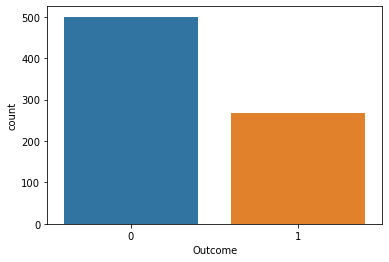

In [9]:
sns.countplot(x=df['Outcome'])

In [7]:
# Print summary statistics
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

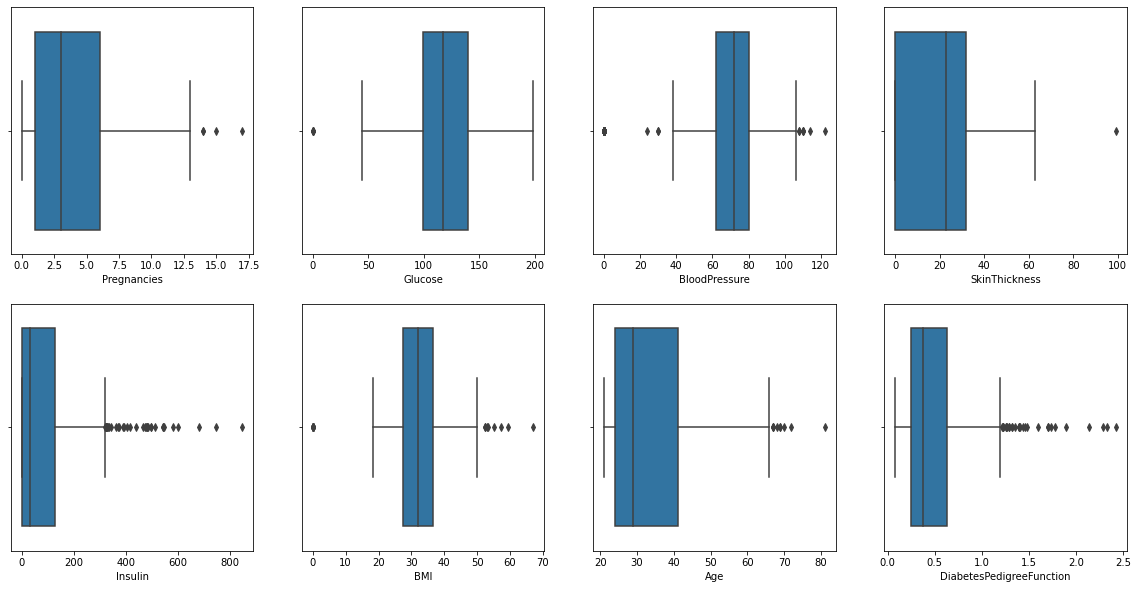

In [90]:
#Univariate analysis age.
f = plt.figure(figsize=(20,10))
f.add_subplot(2,4,1)
sns.boxplot(x=df['Pregnancies'])
f.add_subplot(2,4,2)
sns.boxplot(x=df['Glucose'])
f.add_subplot(2,4,3)
sns.boxplot(x=df['BloodPressure'])
f.add_subplot(2,4,4)
sns.boxplot(x=df['SkinThickness'])
f.add_subplot(2,4,5)
sns.boxplot(x=df['Insulin'])
f.add_subplot(2,4,6)
sns.boxplot(x=df['BMI'])
f.add_subplot(2,4,7)
sns.boxplot(x=df['Age'])
f.add_subplot(2,4,8)
sns.boxplot(x=df['DiabetesPedigreeFunction'])

In [55]:
# Check for NAs in data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
# Count number of zeros in all columns of Dataframe
for col_name in df.columns:
    col = df[col_name]
    # Get the count of Zeros in column 
    count = (col == 0).sum()
    print('Count of zeros in column =', col_name, ' :', count)

Count of zeros in column = Pregnancies  : 111
Count of zeros in column = Glucose  : 0
Count of zeros in column = BloodPressure  : 0
Count of zeros in column = SkinThickness  : 0
Count of zeros in column = Insulin  : 0
Count of zeros in column = BMI  : 0
Count of zeros in column = DiabetesPedigreeFunction  : 0
Count of zeros in column = Age  : 0
Count of zeros in column = Outcome  : 500


In [93]:
col_dq = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]  # Zero pregancies are deemed a valid result
df[col_dq] = df[col_dq].replace(['0',0], np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [96]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
df[col_dq] = df[col_dq].fillna(df[col_dq].median())

In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
#df["Insulin"].hist(edgecolor = "black");

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

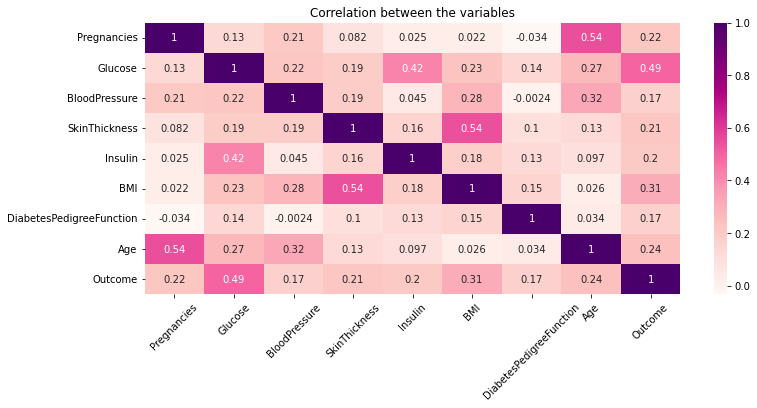

In [104]:
#correlation matrix and the heatmap
plt.subplots(figsize=(12,5))
table_correlation=df.corr()
sns.heatmap(table_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

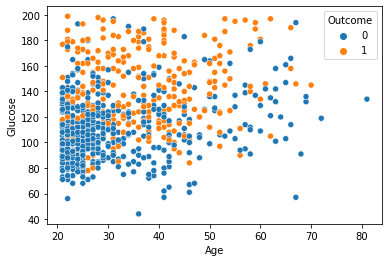

In [105]:
sns.scatterplot(x='Age',
                y='Glucose',
                data=df,
                hue="Outcome")
plt.show()

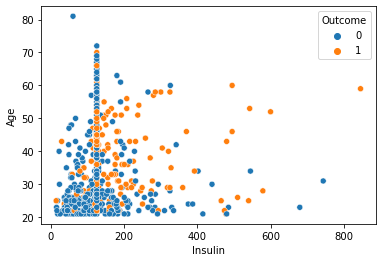

In [106]:
sns.scatterplot(x='Insulin',
                y='Age',
                data=df,
                hue="Outcome")
plt.show()

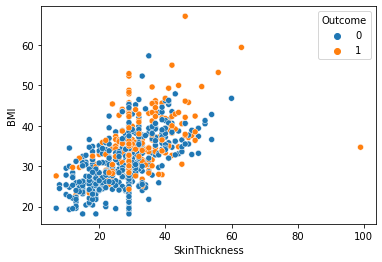

In [107]:
sns.scatterplot(x='SkinThickness',
                y='BMI',
                data=df,
                hue="Outcome")
plt.show()

In [108]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#from sklearn import svm
#from sklearn.linear_model import LogisticRegression
# import the metrics class

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [109]:
X = df.drop(['Outcome'], axis=1).values
y = df['Outcome'].values

scaler=MinMaxScaler()
X_minmax = scaler.fit_transform(X)
#print(X_minmax)
#print(y)

In [110]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create a k-NN classifier with 3 neighbors: knn
knn= KNeighborsClassifier(n_neighbors=7,leaf_size=2, p=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Print the accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7402597402597403


In [111]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7694805194805194


Accuracy: 0.7662337662337663


In [70]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[164,  42],
       [ 45,  57]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

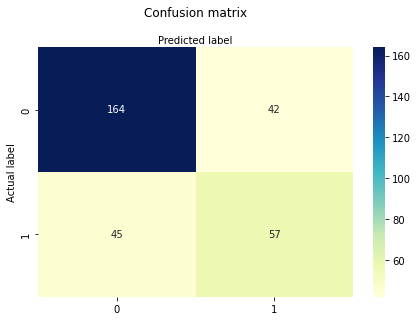

In [71]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

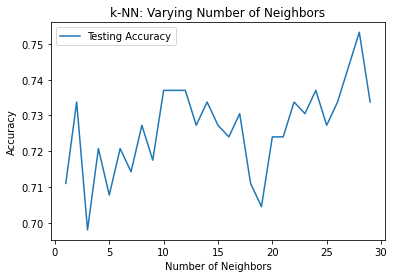

In [72]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    #train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

In [73]:
def scale_prediction(my_array):
    my_array_reshaped = np.array(my_array).reshape(1, -1)
    my_array_minmax = scaler.fit_transform(my_array_reshaped)
    return my_array_minmax

def scale_reshape(my_array):
    my_array_reshape = np.array(my_array).reshape(1, -1)
    return my_array_reshape

In [74]:
# 'Team_le', 'GD','L'
# 25 MANC | 41 WHU | 26 MANU

#print(myteam_le('West Ham'))

manc_le = 33
manu_le = 26
wham_le = 58

team_le = 33
est_w = 25
est_l = 10

my_array1 = [manc_le, est_w, est_l]
print(my_array1)
print('Man City: ', knn.predict(scale_reshape(my_array1)))
#print('Man City: ', knn2.predict(scale_prediction(my_array2)))

my_array2 = [wham_le, est_w+10, est_l-10]
print(my_array2)
print('West Ham:', knn.predict(scale_reshape(my_array2)))
#print('West Ham:',knn2.predict(scale_prediction(my_array2)))


[33, 25, 10]


ValueError: query data dimension must match training data dimension

In [75]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 7
